## 0. Import Libraries

In [18]:
from scripts.data_setup import create_dataloaders
from scripts.utils import visualize_random_image, plot_transformed_images
from pathlib import Path
import os
import random
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torch
from torchinfo import summary

## 1. Data Exploration and Analysis

In [2]:
train_dir = Path("dataset/asl_alphabet_train")
test_dir = Path("dataset/asl_alphabet_test")

train_dir,test_dir

(WindowsPath('dataset/asl_alphabet_train'),
 WindowsPath('dataset/asl_alphabet_test'))

In [3]:
train_dataloader, test_dataloader, class_names = create_dataloaders(train_dir=train_dir,
                                                                    test_dir=test_dir,
                                                                    transform=None,
                                                                    batch_size=32)

In [4]:
print(class_names)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']


In [5]:
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x22fb6aa6060>,
 <torch.utils.data.dataloader.DataLoader at 0x22fb6a19880>)

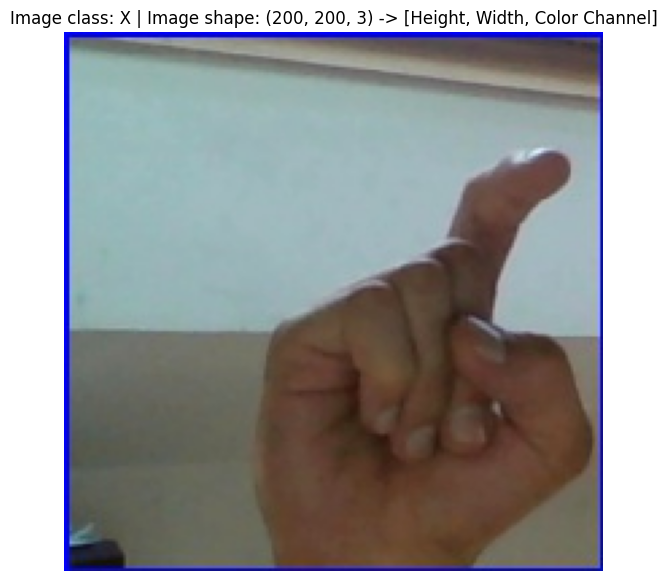

In [6]:
visualize_random_image(img_dir=Path("dataset"))

In [7]:
weights = torchvision.models.MobileNet_V2_Weights.DEFAULT
weights

MobileNet_V2_Weights.IMAGENET1K_V2

In [8]:
auto_transforms = weights.transforms()
auto_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[232]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.843908..2.1171243].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.8610327..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9131652..1.7522904].


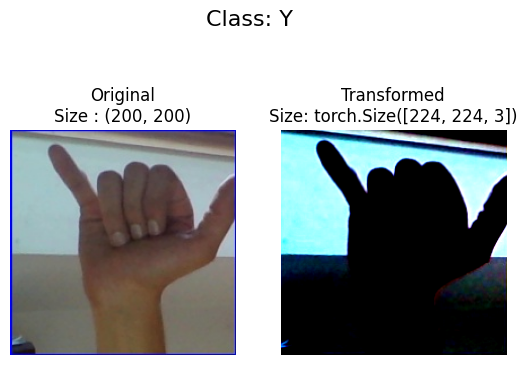

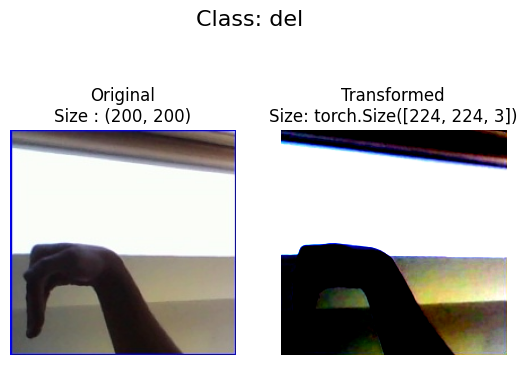

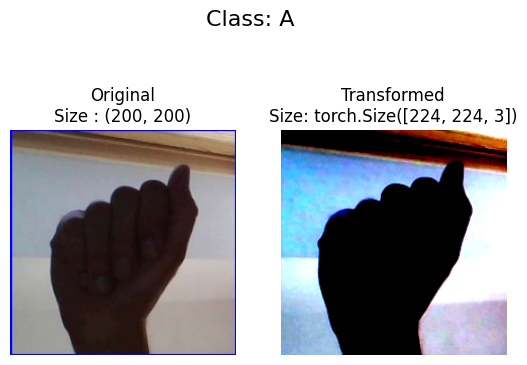

In [12]:
plot_transformed_images(image_path=Path("dataset"),
                        transform=auto_transforms)

In [14]:
weights = torchvision.models.MobileNet_V2_Weights.DEFAULT

model = torchvision.models.mobilenet_v2(weights=weights)
model

Downloading: "https://download.pytorch.org/models/mobilenet_v2-7ebf99e0.pth" to C:\Users\arda/.cache\torch\hub\checkpoints\mobilenet_v2-7ebf99e0.pth
100%|██████████| 13.6M/13.6M [00:01<00:00, 8.52MB/s]


MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [15]:
model.features

Sequential(
  (0): Conv2dNormActivation(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU6(inplace=True)
  )
  (1): InvertedResidual(
    (conv): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
      )
      (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (2): InvertedResidual(
    (conv): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (

In [17]:
model.classifier

Sequential(
  (0): Dropout(p=0.2, inplace=False)
  (1): Linear(in_features=1280, out_features=1000, bias=True)
)

In [19]:
summary(model=model,
        input_size=(1,3,224,224),
        col_names=["input_size","output_size","num_params","trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                       Input Shape          Output Shape         Param #              Trainable
MobileNetV2 (MobileNetV2)                     [1, 3, 224, 224]     [1, 1000]            --                   True
├─Sequential (features)                       [1, 3, 224, 224]     [1, 1280, 7, 7]      --                   True
│    └─Conv2dNormActivation (0)               [1, 3, 224, 224]     [1, 32, 112, 112]    --                   True
│    │    └─Conv2d (0)                        [1, 3, 224, 224]     [1, 32, 112, 112]    864                  True
│    │    └─BatchNorm2d (1)                   [1, 32, 112, 112]    [1, 32, 112, 112]    64                   True
│    │    └─ReLU6 (2)                         [1, 32, 112, 112]    [1, 32, 112, 112]    --                   --
│    └─InvertedResidual (1)                   [1, 32, 112, 112]    [1, 16, 112, 112]    --                   True
│    │    └─Sequential (conv)                 [1, 32, 112, 112]    [1, 16, 112, 112] 

In [20]:
# Freezing All of base layers in EffNetB0
# Update yapılmasını istemiyoruz !
for param in model.features.parameters():
    # print(param)
    param.requires_grad = False

In [21]:
from torch import nn

torch.manual_seed(42)

model.classifier = nn.Sequential(
    nn.Dropout(p=0.2,inplace=True),
    nn.Linear(in_features=1280, # Feature vector coming in
              out_features=len(class_names))
)

model.classifier

Sequential(
  (0): Dropout(p=0.2, inplace=True)
  (1): Linear(in_features=1280, out_features=29, bias=True)
)

In [22]:
summary(model=model,
        input_size=(1,3,224,224),
        col_names=["input_size","output_size","num_params","trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                       Input Shape          Output Shape         Param #              Trainable
MobileNetV2 (MobileNetV2)                     [1, 3, 224, 224]     [1, 29]              --                   Partial
├─Sequential (features)                       [1, 3, 224, 224]     [1, 1280, 7, 7]      --                   False
│    └─Conv2dNormActivation (0)               [1, 3, 224, 224]     [1, 32, 112, 112]    --                   False
│    │    └─Conv2d (0)                        [1, 3, 224, 224]     [1, 32, 112, 112]    (864)                False
│    │    └─BatchNorm2d (1)                   [1, 32, 112, 112]    [1, 32, 112, 112]    (64)                 False
│    │    └─ReLU6 (2)                         [1, 32, 112, 112]    [1, 32, 112, 112]    --                   --
│    └─InvertedResidual (1)                   [1, 32, 112, 112]    [1, 16, 112, 112]    --                   False
│    │    └─Sequential (conv)                 [1, 32, 112, 112]    [1, 16, 11

In [23]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),
                             lr=0.001)

In [24]:
from scripts.engine import train

In [25]:
from timeit import default_timer as timer

torch.manual_seed(42)

start_time = timer()

results = train(model=model,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=5)

end_timer = timer()

print(f"[INFO] Total training time: {end_timer-start_time:.3f} seconds.")

  0%|          | 0/5 [00:07<?, ?it/s]


KeyboardInterrupt: 